#Importing the required libraries

In [ ]:
import pandas as pd
import numpy as  np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_excel('transactions.xlsx')

# Getting to know your data

**Performing the Basic EDA**

In [ ]:
df.head()

cid     d_c   amt country
0  8345   Debit  4342      SE
1  3138   Debit  5852      SE
2  5233   Debit  3517      SE
3  8634   Debit  5325      DK
4  8076  Credit  4815      SE

In [ ]:
df.shape

(155181, 4)

In [ ]:
df.info() #-- No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155181 entries, 0 to 155180
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cid      155181 non-null  int64 
 1   d_c      155181 non-null  object
 2   amt      155181 non-null  int64 
 3   country  155181 non-null  object
dtypes: int64(2), object(2)
memory usage: 4.7+ MB


In [ ]:
# check duplicate values;
df.duplicated().sum()

945

In [ ]:

df[df.duplicated()]

cid     d_c   amt country
51      5860   Debit   623      SE
189     5860   Debit   627      FI
215     5860   Debit   636      DK
301     5860   Debit   622      DK
336     5860   Debit   632      DK
...      ...     ...   ...     ...
152408  5989   Debit  3808      SE
153374  5860  Credit   613      SE
153904  5862   Debit  4174      SE
154668  5860  Credit   630      DK
154740   701  Credit  5324      SE

[945 rows x 4 columns]

In [ ]:
df[df.duplicated()]['cid'].value_counts()

5860    849
3696      2
544       2
4377      1
9661      1
       ... 
2847      1
4246      1
9043      1
8205      1
701       1
Name: cid, Length: 95, dtype: int64

In [ ]:
#lets see data in statistical view
df.describe()

cid           amt
count  155181.000000  1.551810e+05
mean     5002.995457  5.019420e+03
std      2880.680223  1.165956e+04
min         0.000000 -2.187000e+03
25%      2512.000000  3.910000e+03
50%      5030.000000  5.001000e+03
75%      7483.000000  6.087000e+03
max      9999.000000  4.466616e+06

In [ ]:
# check for the negative values
df[(df['amt']<0)].shape

(102, 4)

In [ ]:
df.drop(df[(df['amt']<0)].index,inplace=True)

In [ ]:
df.shape

(155079, 4)

In [ ]:
#checking for the normalization
df['cid'].value_counts()

5860    1123
8286      25
8531      23
6255      23
6108      23
        ... 
1397       6
2985       5
1467       4
1223       3
8816       2
Name: cid, Length: 10000, dtype: int64

In [ ]:
df['country'].value_counts()
# Data is not normalized

FI    51694
DK    51630
SE    51420
RO      331
CY        2
RU        1
PL        1
Name: country, dtype: int64

since the data is not normalized among the countries and the data points are less to provide the insights so, removing the three countries CY, RU, PL

In [ ]:
df['d_c'].value_counts()
# data is Normalized

Credit    77653
Debit     77426
Name: d_c, dtype: int64

In [ ]:
df[(df['country'].isin(['CY','RU','PL']))]
# Amount found to be superficial for these countries

cid     d_c      amt country
155176  6741   Debit  4466616      CY
155178  6817  Credit   681636      CY
155179  7292   Debit      666      RU
155180  4277   Debit    30755      PL

In [ ]:
df1=df[(df['country'].isin(['FI','DK','RO','SE']))]

In [ ]:
df1.head()

cid     d_c   amt country
0  8345   Debit  4342      SE
1  3138   Debit  5852      SE
2  5233   Debit  3517      SE
3  8634   Debit  5325      DK
4  8076  Credit  4815      SE

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
y=df1['amt']

fig.add_trace(go.Box(y=y, name='Amount'))
fig.show()

# Analysis of the Data

ANALYZING THE DATA MUCH DEEPER

In [ ]:
# country wise anlaysis
df1.groupby(["country", "d_c"])["amt"].min()

country  d_c   
DK       Credit      14
         Debit        5
FI       Credit       1
         Debit        1
RO       Credit     868
         Debit     1058
SE       Credit      43
         Debit       16
Name: amt, dtype: int64

In [ ]:
df1.groupby(["country", "d_c"])["amt"].max()

country  d_c   
DK       Credit     11539
         Debit     524750
FI       Credit     11143
         Debit      11047
RO       Credit    134929
         Debit     158208
SE       Credit     11070
         Debit      11167
Name: amt, dtype: int64

In [ ]:
df1.groupby(["country", "d_c"])["amt"].count()

country  d_c   
DK       Credit    25641
         Debit     25989
FI       Credit    26094
         Debit     25600
RO       Credit      175
         Debit       156
SE       Credit    25742
         Debit     25678
Name: amt, dtype: int64

In [ ]:
mean=pd.DataFrame(df.groupby(["cid"])["amt"].mean())

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
y=mean['amt']

fig.add_trace(go.Box(y=y, name='Mean Amount'))
fig.show()

Mean amount of each customer is 5000 and upper fence is 8000 and value above that is outlier

Romania leads with minimum amou nt of transactions and maximum amount of transactions done by the user.


In [ ]:
df1.groupby(["country", "d_c"])["amt"].mean()

country  d_c   
DK       Credit    4983.117624
         Debit     5022.969218
FI       Credit    4989.776424
         Debit     4993.105156
RO       Credit    3851.280000
         Debit     4085.525641
SE       Credit    4981.331987
         Debit     4981.326856
Name: amt, dtype: float64

In [ ]:
df1[(df1['amt']>9000) & (df1['country']=='RO')]

cid     d_c     amt country
2818   570   Debit  158208      RO
8383  2845  Credit  134929      RO

# Analysing the Customers and doing feature engineering

**Customer Segmentation**

In [ ]:
# no of gtransactions per customer
df2=pd.DataFrame(df1.groupby(["cid"])["amt"].count()).reset_index()
df2

cid  amt
0        0   19
1        1   15
2        2   17
3        3    7
4        4   13
...    ...  ...
9995  9995   13
9996  9996   18
9997  9997   15
9998  9998   17
9999  9999   19

[10000 rows x 2 columns]

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
x=df2['cid']
y=df2['amt']
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='No of Traansactions'))
fig.update_layout(
   title="NO Of Tranactions Per Customer"

    )
fig.show()

In [ ]:
df2.describe()

cid           amt
count  10000.00000  10000.000000
mean    4999.50000     15.507500
std     2886.89568     11.304863
min        0.00000      2.000000
25%     2499.75000     14.000000
50%     4999.50000     15.000000
75%     7499.25000     17.000000
max     9999.00000   1123.000000

In [ ]:
y=df2['amt']
fig = go.Figure()
fig.add_trace(go.Box(y=y, name='No of Transactions'))
fig.update_layout(
   title="NO Of Tranactions Per Customer")
fig.show()

Mean no of transactions done monthly are 15 and there is only one potential outlier who has done 1123 transactions in one month which is suspicious.

**Analyzing the cid=5860**

In [ ]:
c_5860=df[(df['cid']==5860)]
# here it's amount only
c_5860.rename(columns={'amt':'No_Of_Transactions'},inplace=True)

<ipython-input-52-0df2c6c7324b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
c_5860

cid     d_c  No_Of_Transactions country
5       5860   Debit                 623      SE
18      5860   Debit                 649      DK
20      5860   Debit                 618      SE
30      5860   Debit                 633      SE
45      5860   Debit                 632      FI
...      ...     ...                 ...     ...
147567  5860  Credit                6199      FI
149501  5860  Credit                 642      SE
151287  5860  Credit                 640      DK
153374  5860  Credit                 613      SE
154668  5860  Credit                 630      DK

[1123 rows x 4 columns]

In [ ]:
c_5860['No_Of_Transactions'].value_counts()[20::-1]

621    26
622    27
642    27
628    29
624    32
640    34
627    34
623    36
638    37
626    37
634    38
635    38
625    39
631    41
637    41
636    43
639    44
632    44
633    44
630    47
629    52
Name: No_Of_Transactions, dtype: int64

In [ ]:
c_5860['country'].value_counts()

SE    388
DK    372
FI    363
Name: country, dtype: int64

In [ ]:
c_5860[(c_5860['No_Of_Transactions'].isin([629,630,633,632,639]))]['country'].value_counts()

SE    85
FI    75
DK    71
Name: country, dtype: int64

So , this customer is suspicious and has done many transactions in smaller denominations keeping the balanced between countries. So, this customer is suspicious. and only 18 transactions are done of higher denomination that is above 6000 to maintain the average.

In [ ]:
# average transactions per customer
df3=pd.DataFrame(df1.groupby(["cid"])["amt"].mean()).reset_index()
df3

cid          amt
0        0  4061.526316
1        1  4614.733333
2        2  4548.000000
3        3  4083.571429
4        4  4770.538462
...    ...          ...
9995  9995  4189.846154
9996  9996  4457.500000
9997  9997  2979.666667
9998  9998  6273.705882
9999  9999  3616.000000

[10000 rows x 2 columns]

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
x=df3['cid']
y=df3['amt']
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Mean Amount'))
fig.show()

In [ ]:
y=df3['amt']
fig = go.Figure()
fig.add_trace(go.Box(y=y, name='Mean Amount'))
fig.show()

Only 4 customers are outliers i.e., 570, 1519, 2845, 6847

In [ ]:
df3.rename(columns={'amt':'Mean_amount'},inplace=True)

In [ ]:
df3[(df3['Mean_amount'])>10000]

cid   Mean_amount
570    570  14745.235294
1519  1519  15844.750000
2845  2845  13734.166667
6847  6847  43292.785714

Analysing these customers in detail

In [ ]:
df[(df['cid']==2845)]

cid     d_c     amt country
1449    2845  Credit    6316      DK
8383    2845  Credit  134929      RO
14451   2845  Credit    6288      DK
16755   2845  Credit    7120      FI
21143   2845  Credit    4739      SE
34673   2845  Credit    7006      FI
37391   2845  Credit    7466      DK
44794   2845  Credit    7395      SE
49932   2845  Credit    6648      FI
64619   2845  Credit    6833      DK
81640   2845  Credit    5947      DK
87172   2845  Credit    6493      FI
100200  2845   Debit    7521      DK
104522  2845  Credit    6865      FI
121844  2845   Debit    7007      DK
131262  2845   Debit    6836      SE
136979  2845   Debit    6280      DK
147144  2845  Credit    5526      FI

All the transactions are done above the average range and only transaction done to Romania of more than 100,000 Euros which is suspectible

In [ ]:
df[(df['cid']==1519)]

cid     d_c     amt country
7798    1519  Credit    3788      DK
12067   1519  Credit    4046      FI
15373   1519  Credit    3395      DK
25845   1519  Credit    3471      DK
33390   1519  Credit    3708      SE
37198   1519   Debit    3965      SE
40119   1519   Debit  244351      DK
48173   1519   Debit    4133      SE
62058   1519   Debit    3435      FI
66806   1519  Credit    3537      DK
71154   1519  Credit    3726      FI
83718   1519  Credit    3196      FI
86104   1519   Debit    3684      FI
99562   1519  Credit    3943      FI
107804  1519  Credit    4168      DK
109346  1519  Credit    4357      DK
124518  1519  Credit    3776      SE
131467  1519   Debit    3765      SE
142216  1519   Debit    4702      FI
145973  1519   Debit    3749      FI

All the transactions done are approximately at par with the mean and only one transaction is done above 100,000 Euros which can be due to missing of decimal or writing the data point

In [ ]:
df[(df['cid']==570)]

cid     d_c     amt country
2818    570   Debit  158208      RO
12090   570   Debit    5694      FI
31029   570  Credit    6328      DK
41515   570  Credit    5505      SE
48257   570   Debit    6550      DK
58074   570  Credit    6144      SE
64133   570   Debit    6148      FI
71120   570  Credit    5548      DK
79559   570   Debit    6009      FI
90097   570   Debit    5874      DK
96563   570   Debit    6155      FI
106696  570  Credit    6075      SE
114885  570  Credit    4544      DK
118092  570  Credit    5613      FI
131223  570  Credit    4629      FI
136456  570   Debit    6071      FI
148492  570   Debit    5574      FI

Done all the transactions at par with mean an only one transaction above the 100,000Euros to RO.

In [ ]:
df[(df['cid']==6847)]

cid     d_c     amt country
10835   6847  Credit    6071      DK
12948   6847   Debit    6892      FI
24865   6847  Credit    7032      DK
30021   6847   Debit    6137      DK
36033   6847  Credit    6002      DK
48269   6847  Credit    6170      DK
65738   6847   Debit    5805      SE
94836   6847   Debit    6193      DK
101125  6847   Debit    6555      DK
110912  6847  Credit    6128      DK
122547  6847   Debit    6994      SE
128773  6847   Debit    6000      DK
142454  6847  Credit    5370      FI
155177  6847   Debit  524750      DK

On analysing the customers, it is found that there are 4 customers -6847,570,1519,2845 which are questionable but due to lack of data points it is difficult to provid insights. So, rmoving 6847,2845 as they both have same patterns.

Credit to debit Ratio-Analysing the customers who have done more credit transactions than debit transactions.


In [ ]:
df4=pd.DataFrame(df1.groupby(["cid",'d_c'])["amt"].count()).reset_index()
credit=df4[(df4['d_c']=='Credit')]
debit=df4[(df4['d_c']=='Debit')]
customer = pd.merge(credit, debit,how="left" ,on=["cid", "cid"])
customer=customer[['cid','amt_x','amt_y']]
customer['ratio']=customer['amt_x'].div(customer['amt_y'])

In [ ]:
y0 = df4[(df4['d_c']=='Debit')]['amt']
y1 = df4[(df4['d_c']=='Credit')]['amt']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Debit"))
fig.add_trace(go.Box(y=y1,name="Credit"))

fig.show()

In [ ]:
fig = go.Figure()
y=customer['ratio']
fig.add_trace(go.Box(y=y, name='customer'))
fig.show()

In [ ]:
import plotly.graph_objs as go
fig = go.Figure()
x=customer['cid']
y=customer['ratio']
fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Mean Amount'))
fig.show()

In [ ]:
# removing the potentional suspicious customers
df1=df1[(df1['cid']!=5860)]
df1=df1[(df1['cid']!=6847)]
df1=df1[(df1['cid']!=2845)]

In [ ]:
df1.shape

(153920, 4)

In [ ]:

customer=customer[(customer['cid']!=5860)]
customer=customer[(customer['cid']!=6847)]
customer=customer[(customer['cid']!=2845)]

In [ ]:
customer

cid  amt_x  amt_y     ratio
0        0     10    9.0  1.111111
1        1      6    9.0  0.666667
2        2      9    8.0  1.125000
3        3      6    1.0  6.000000
4        4      5    8.0  0.625000
...    ...    ...    ...       ...
9994  9995      7    6.0  1.166667
9995  9996      8   10.0  0.800000
9996  9997      8    7.0  1.142857
9997  9998      7   10.0  0.700000
9998  9999     12    7.0  1.714286

[9996 rows x 4 columns]

In [ ]:
customer.rename(columns = {'amt_x':'Credit_No','amt_y':'Debit_No'}, inplace = True)

In [ ]:
customer=customer[['cid','Credit_No','Debit_No','ratio']]

In [ ]:
customer = pd.merge(customer, df1.groupby(["cid"])["amt"].mean(),how="left" ,on=["cid", "cid"])

In [ ]:
customer

cid  Credit_No  Debit_No     ratio          amt
0        0         10       9.0  1.111111  4061.526316
1        1          6       9.0  0.666667  4614.733333
2        2          9       8.0  1.125000  4548.000000
3        3          6       1.0  6.000000  4083.571429
4        4          5       8.0  0.625000  4770.538462
...    ...        ...       ...       ...          ...
9991  9995          7       6.0  1.166667  4189.846154
9992  9996          8      10.0  0.800000  4457.500000
9993  9997          8       7.0  1.142857  2979.666667
9994  9998          7      10.0  0.700000  6273.705882
9995  9999         12       7.0  1.714286  3616.000000

[9996 rows x 5 columns]

In [ ]:
customer.rename(columns = {'amt':'Average'}, inplace = True)

In [ ]:
cd=pd.DataFrame(df1.groupby(["cid","d_c"])["amt"].mean()).reset_index()
f=cd[(cd['d_c']=='Debit')]
s=cd[(cd['d_c']=='Credit')]

In [ ]:
cd = pd.merge(s, f,how="left" ,on=["cid", "cid"])

In [ ]:
cd.head()

cid   d_c_x        amt_x  d_c_y        amt_y
0    0  Credit  4249.000000  Debit  3853.222222
1    1  Credit  4208.000000  Debit  4885.888889
2    2  Credit  4474.777778  Debit  4630.375000
3    3  Credit  4062.500000  Debit  4210.000000
4    4  Credit  4731.000000  Debit  4795.250000

In [ ]:
customer = pd.merge(customer, cd,how='left' ,on=["cid", "cid"])

In [ ]:
customer

cid  Credit_No  Debit_No     ratio      Average   d_c_x        amt_x  \
0        0         10       9.0  1.111111  4061.526316  Credit  4249.000000   
1        1          6       9.0  0.666667  4614.733333  Credit  4208.000000   
2        2          9       8.0  1.125000  4548.000000  Credit  4474.777778   
3        3          6       1.0  6.000000  4083.571429  Credit  4062.500000   
4        4          5       8.0  0.625000  4770.538462  Credit  4731.000000   
...    ...        ...       ...       ...          ...     ...          ...   
9991  9995          7       6.0  1.166667  4189.846154  Credit  4176.571429   
9992  9996          8      10.0  0.800000  4457.500000  Credit  4400.875000   
9993  9997          8       7.0  1.142857  2979.666667  Credit  3077.500000   
9994  9998          7      10.0  0.700000  6273.705882  Credit  6079.000000   
9995  9999         12       7.0  1.714286  3616.000000  Credit  3631.833333   

      d_c_y        amt_y  
0     Debit  3853.222222  
1     Debit  4885.888889  
2     Debit  4630.375000  
3     Debit  4210.000000  
4     Debit  4795.250000  
...     ...          ...  
9991  Debit  4205.333333  
9992  Debit  4502.800000  
9993  Debit  2867.857143  
9994  Debit  6410.000000  
9995  Debit  3588.857143  

[9996 rows x 9 columns]

In [ ]:
customer.rename(columns = {'amt_x':'Credit_Average','amt_y':'Debit_Average'}, inplace = True)

In [ ]:
customer=customer[['cid','Credit_No','Debit_No','ratio','Average','Credit_Average','Debit_Average']]

In [ ]:
customer

cid  Credit_No  Debit_No     ratio      Average  Credit_Average  \
0        0         10       9.0  1.111111  4061.526316     4249.000000   
1        1          6       9.0  0.666667  4614.733333     4208.000000   
2        2          9       8.0  1.125000  4548.000000     4474.777778   
3        3          6       1.0  6.000000  4083.571429     4062.500000   
4        4          5       8.0  0.625000  4770.538462     4731.000000   
...    ...        ...       ...       ...          ...             ...   
9991  9995          7       6.0  1.166667  4189.846154     4176.571429   
9992  9996          8      10.0  0.800000  4457.500000     4400.875000   
9993  9997          8       7.0  1.142857  2979.666667     3077.500000   
9994  9998          7      10.0  0.700000  6273.705882     6079.000000   
9995  9999         12       7.0  1.714286  3616.000000     3631.833333   

      Debit_Average  
0       3853.222222  
1       4885.888889  
2       4630.375000  
3       4210.000000  
4       4795.250000  
...             ...  
9991    4205.333333  
9992    4502.800000  
9993    2867.857143  
9994    6410.000000  
9995    3588.857143  

[9996 rows x 7 columns]

In [ ]:
y0 = customer['Average']

y2=customer['Credit_Average']
y3=customer['Debit_Average']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Average"))

fig.add_trace(go.Box(y=y2,name="Credit_Average"))
fig.add_trace(go.Box(y=y3,name="Debit_Average"))
fig.show()

In [ ]:
customer.fillna(0,inplace=True)

<ipython-input-92-1cb6d898a275>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Customer Segmentation Without Normalization

For Clustering, applying K means Algorithm.

*  Used the Elbow Method to find the no. of clusters.
*  After finding the no of clusters, modelled the data to K-Means Algorithm
*  Presented the clusters graphically.



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

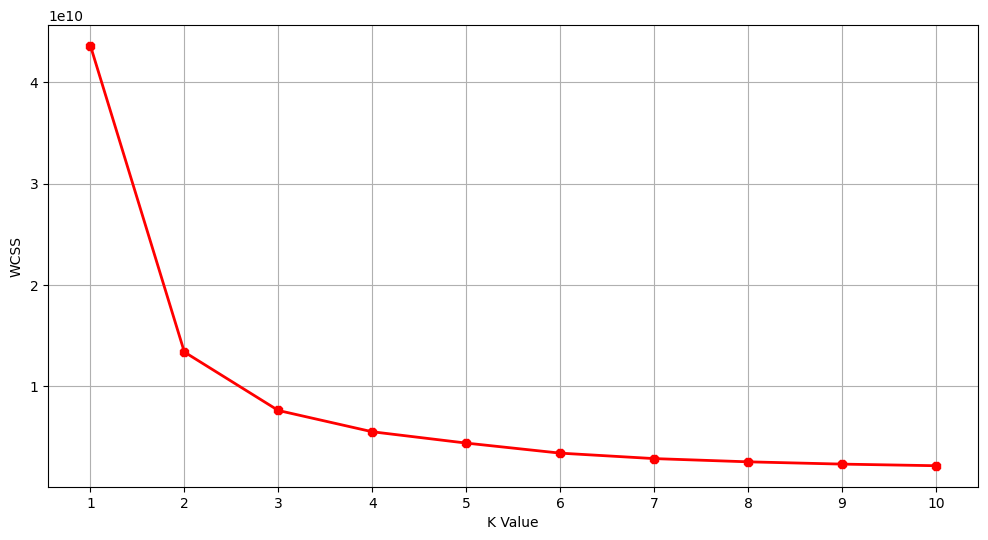

In [ ]:
# Elbow Method to find no. of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(customer.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-94-ef011fdd2729>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



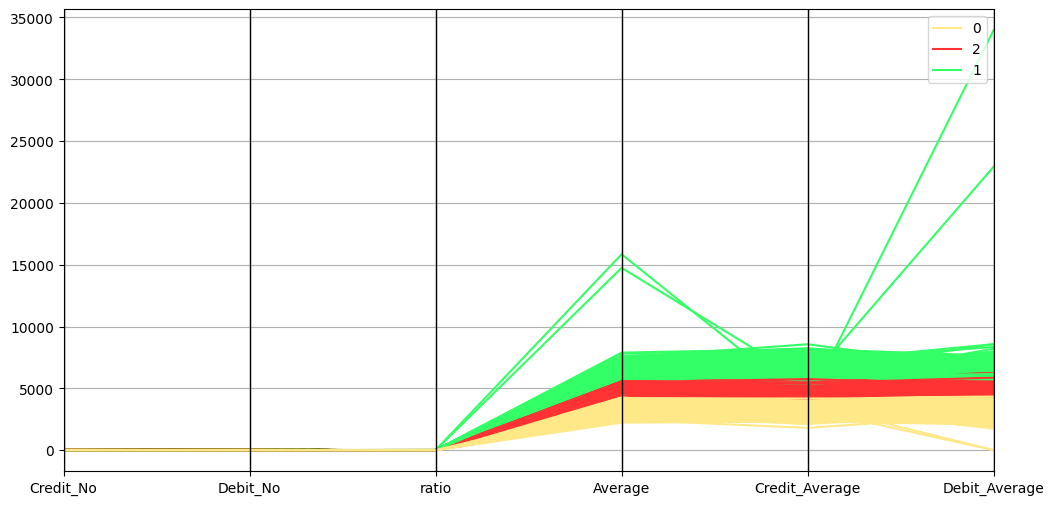

In [ ]:
# Modelling the data into Algorithm

km = KMeans(n_clusters=3)
clusters = km.fit_predict(customer.iloc[:,1:])
customer["label"] = clusters
import pandas as pd
from pandas.plotting import parallel_coordinates


# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(customer.iloc[:,1:], 'label', color=('#FFE888', '#FF3333', '#33FF66'))
plt.show()


In [ ]:
customer['label'].value_counts()

2    3422
0    3296
1    3278
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='Average'>

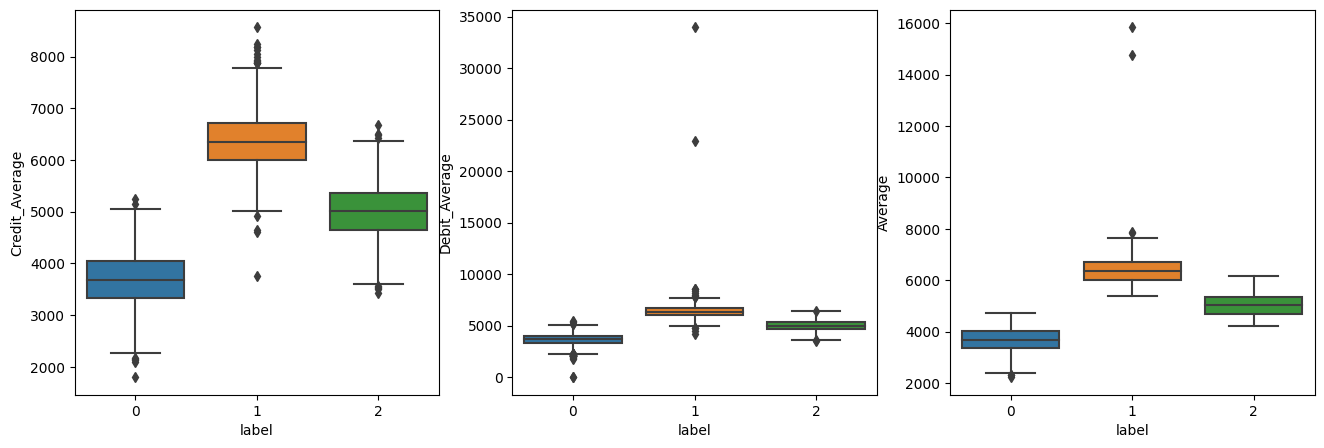

In [ ]:
# Finding the best features that define the clusters

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(x=customer['label'],y=customer['Credit_Average'])
plt.subplot(1,3,2)
sns.boxplot(x=customer['label'],y=customer['Debit_Average'])
plt.subplot(1,3,3)
sns.boxplot(x=customer['label'],y=customer['Average'])


In [ ]:
# presenting the clusters in 3D View
import plotly.express as px
fig = px.scatter_3d(customer, x='Credit_Average', y='Debit_No', z='ratio',
                    color='label',
                    title="3D Scatter Plot")
fig.show()

In [ ]:
y0 = customer[(customer['label']==0)]['ratio']
y1 = customer[(customer['label']==1)]['ratio']
y2 = customer[(customer['label']==2)]['ratio']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.show()

In [ ]:
y0 = customer[(customer['label']==0)]['Credit_Average']
y1 = customer[(customer['label']==1)]['Credit_Average']
y2 = customer[(customer['label']==2)]['Credit_Average']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.show()

In [ ]:
y0 = customer[(customer['label']==0)]['Debit_Average']
y1 = customer[(customer['label']==1)]['Debit_Average']
y2 = customer[(customer['label']==2)]['Debit_Average']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.show()

In [ ]:
y0 = customer[(customer['label']==0)]['Average']
y1 = customer[(customer['label']==1)]['Average']
y2 = customer[(customer['label']==2)]['Average']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.show()

In [ ]:
customer[(customer['Credit_Average']<2263) & (customer['label']==2)]

Empty DataFrame
Columns: [cid, Credit_No, Debit_No, ratio, Average, Credit_Average, Debit_Average, label]
Index: []

# Customer Segmentation After Normalization

Since all the features in Customer Table has different ranges , so it became important to scale the data.
Here, I have used Z-score to scale the data and then model the data.






In [ ]:
# scaling the data
from sklearn.preprocessing import StandardScaler
import numpy as np

# generate some sample data
data=customer.iloc[:,1:-1]

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(data)
cust=np.append(customer.iloc[:,0].to_numpy().reshape(-1,1),normalized_data,axis=1)


In [ ]:
cust=pd.DataFrame(cust,columns=customer.columns[:-1])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

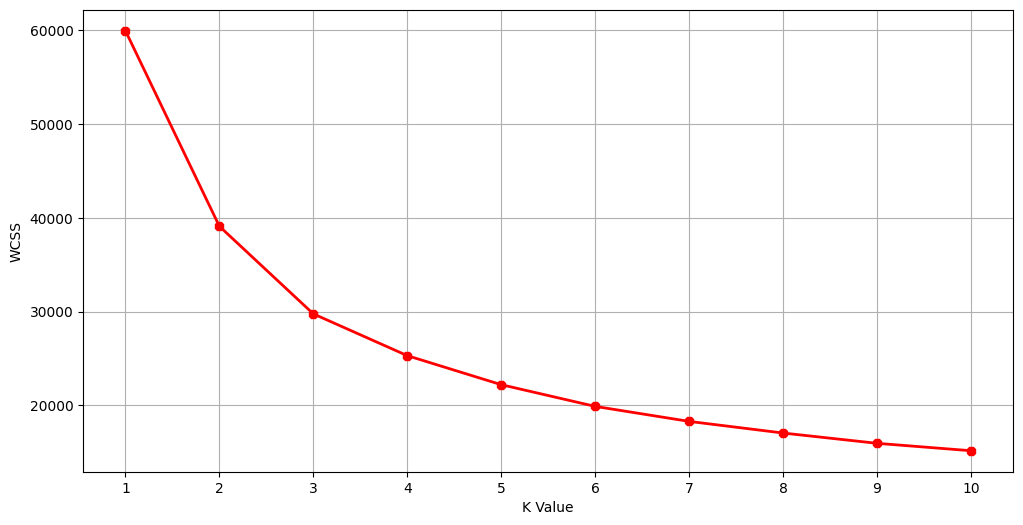

In [ ]:
# applying Clustering Algorithm --Kmeans
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
cust.head()

cid  Credit_No  Debit_No     ratio   Average  Credit_Average  Debit_Average
0  0.0   1.010461  0.578496 -0.079002 -0.811758       -0.640394      -0.935517
1  1.0  -0.747841  0.578496 -0.637077 -0.341182       -0.674613      -0.105344
2  2.0   0.570885  0.135041 -0.061562 -0.397948       -0.451963      -0.310755
3  3.0  -0.747841 -2.969137  6.059823 -0.793006       -0.796046      -0.648699
4  4.0  -1.187416  0.135041 -0.689397 -0.208649       -0.238122      -0.178210

In [ ]:
cust1=customer.iloc[:,:-1]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



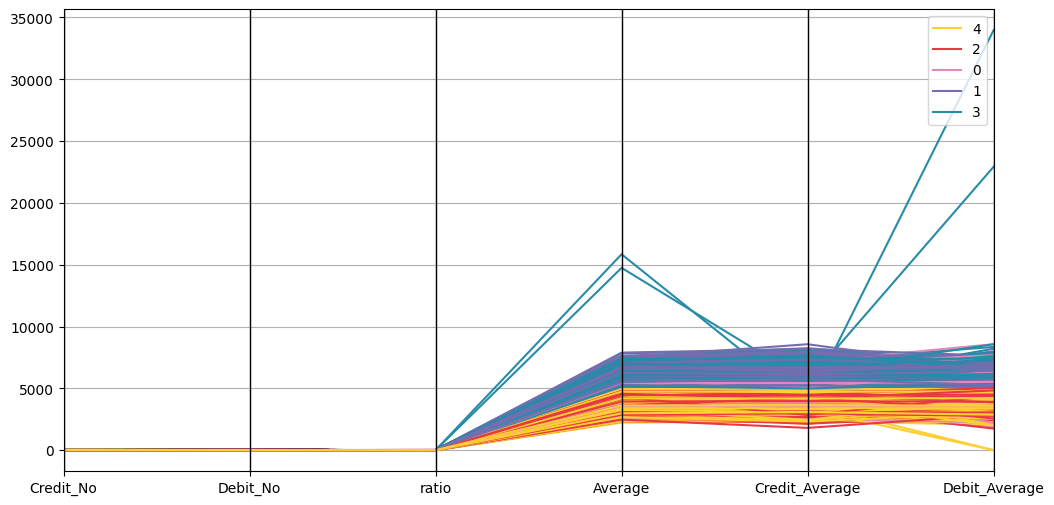

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(cust.iloc[:,1:])
cust1["label"] = clusters
import pandas as pd
from pandas.plotting import parallel_coordinates


# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(cust1.iloc[:,1:], 'label', color=('#FFCE30', '#E83845', '#E389B9','#746EB0','#288BA8'))
plt.show()


In [ ]:
cust1

cid  Credit_No  Debit_No     ratio      Average  Credit_Average  \
0        0         10       9.0  1.111111  4061.526316     4249.000000   
1        1          6       9.0  0.666667  4614.733333     4208.000000   
2        2          9       8.0  1.125000  4548.000000     4474.777778   
3        3          6       1.0  6.000000  4083.571429     4062.500000   
4        4          5       8.0  0.625000  4770.538462     4731.000000   
...    ...        ...       ...       ...          ...             ...   
9991  9995          7       6.0  1.166667  4189.846154     4176.571429   
9992  9996          8      10.0  0.800000  4457.500000     4400.875000   
9993  9997          8       7.0  1.142857  2979.666667     3077.500000   
9994  9998          7      10.0  0.700000  6273.705882     6079.000000   
9995  9999         12       7.0  1.714286  3616.000000     3631.833333   

      Debit_Average  label  
0       3853.222222      4  
1       4885.888889      2  
2       4630.375000      4  
3       4210.000000      0  
4       4795.250000      2  
...             ...    ...  
9991    4205.333333      4  
9992    4502.800000      2  
9993    2867.857143      4  
9994    6410.000000      1  
9995    3588.857143      4  

[9996 rows x 8 columns]

In [ ]:
import plotly.express as px
fig = px.scatter_3d(cust1, x='Credit_Average', y='Debit_No', z='ratio',
                    color='label',
                    title="3D Scatter Plot")
fig.show()

In [ ]:
cust1['label'].value_counts()

4    2498
3    2366
1    2288
2    2257
0     587
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='Debit_Average'>

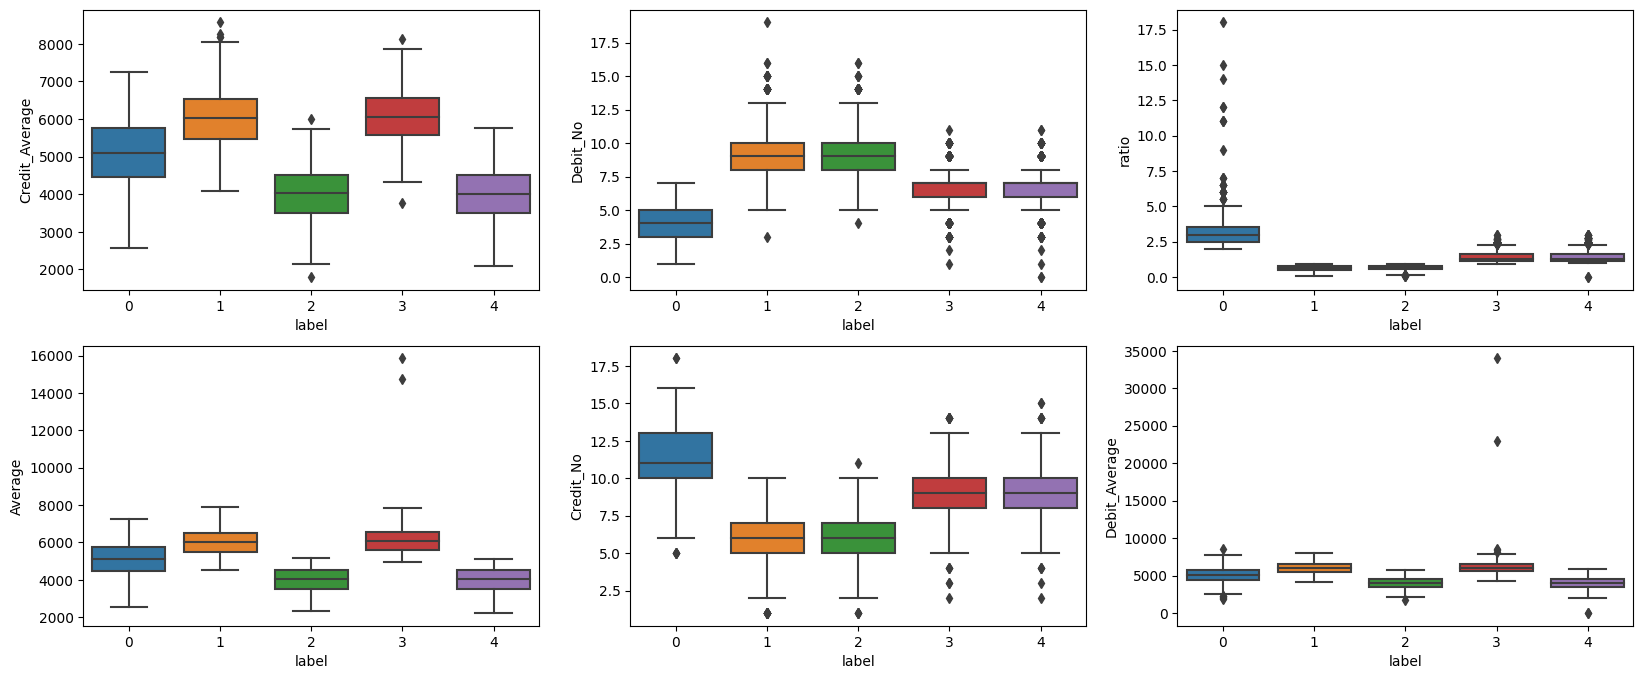

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(x=cust1['label'],y=cust1['Credit_Average'])

plt.subplot(2,3,2)
sns.boxplot(x=cust1['label'],y=cust1['Debit_No'])
plt.subplot(2,3,3)
sns.boxplot(x=cust1['label'],y=cust1['ratio'])
plt.subplot(2,3,4)
sns.boxplot(x=cust1['label'],y=cust1['Average'])
plt.subplot(2,3,5)
sns.boxplot(x=cust1['label'],y=cust1['Credit_No'])
plt.subplot(2,3,6)
sns.boxplot(x=cust1['label'],y=cust1['Debit_Average'])



In [ ]:
y0 = cust1[(cust1['label']==0)]['Average']
y1 = cust1[(cust1['label']==1)]['Average']
y2 = cust1[(cust1['label']==2)]['Average']
y3= cust1[(cust1['label']==3)]['Average']
y4 = cust1[(cust1['label']==4)]['Average']

fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))


fig.show()

In [ ]:
y0 = cust1[(cust1['label']==0)]['Credit_Average']
y1 = cust1[(cust1['label']==1)]['Credit_Average']
y2 = cust1[(cust1['label']==2)]['Credit_Average']
y3= cust1[(cust1['label']==3)]['Credit_Average']
y4 = cust1[(cust1['label']==4)]['Credit_Average']

fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))
fig.show()

In [ ]:
cust1[(cust1['label']==4) & (cust1['Credit_Average']>8056)]

Empty DataFrame
Columns: [cid, Credit_No, Debit_No, ratio, Average, Credit_Average, Debit_Average, label]
Index: []

In [ ]:
y0 = cust1[(cust1['label']==0)]['Debit_Average']
y1 = cust1[(cust1['label']==1)]['Debit_Average']
y2 = cust1[(cust1['label']==2)]['Debit_Average']
y3= cust1[(cust1['label']==3)]['Debit_Average']
y4 = cust1[(cust1['label']==4)]['Debit_Average']

fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))


fig.show()

In [ ]:
y0 = cust1[(cust1['label']==0)]['ratio']
y1 = cust1[(cust1['label']==1)]['ratio']
y2 = cust1[(cust1['label']==2)]['ratio']
y3= cust1[(cust1['label']==3)]['ratio']
y4 = cust1[(cust1['label']==4)]['ratio']

fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))


fig.show()

In [ ]:
y0 = cust1[(cust1['label']==0)]['Credit_No']
y1 = cust1[(cust1['label']==1)]['Credit_No']
y2 = cust1[(cust1['label']==2)]['Credit_No']
y3= cust1[(cust1['label']==3)]['Credit_No']
y4 = cust1[(cust1['label']==4)]['Credit_No']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))


fig.show()

In [ ]:
y0 = cust1[(cust1['label']==0)]['Debit_No']
y1 = cust1[(cust1['label']==1)]['Debit_No']
y2 = cust1[(cust1['label']==2)]['Debit_No']
y3= cust1[(cust1['label']==3)]['Debit_No']
y4 = cust1[(cust1['label']==4)]['Debit_No']

fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Cluster 0"))
fig.add_trace(go.Box(y=y1,name="Cluster 1"))
fig.add_trace(go.Box(y=y2,name="Cluster 2"))
fig.add_trace(go.Box(y=y3,name="Cluster 3"))
fig.add_trace(go.Box(y=y4,name="Cluster 4"))


fig.show()

# Customer Segmentation Using Countries



*   Forming the features
*   Applying Encoding techniques

*   Normalization of features
*   Clustering it and analysing it graphically





In [ ]:
country=pd.DataFrame(df1.groupby(["cid","country","d_c"])["amt"].count()).reset_index()
country

cid country     d_c  amt
0         0      DK  Credit    5
1         0      DK   Debit    3
2         0      FI   Debit    3
3         0      SE  Credit    5
4         0      SE   Debit    3
...     ...     ...     ...  ...
56136  9999      DK   Debit    5
56137  9999      FI  Credit    4
56138  9999      FI   Debit    1
56139  9999      SE  Credit    8
56140  9999      SE   Debit    1

[56141 rows x 4 columns]

In [ ]:
c=pd.DataFrame()
c=pd.merge(country[(country['d_c']=='Credit')],country[(country['d_c']=='Debit')],how='outer',left_on=['cid','country'], right_on = ['cid','country'])

In [ ]:
c.rename(columns = {'amt_x':'credit_no','amt_y':'debit_no'}, inplace = True)

In [ ]:
c['ratio']=c['credit_no'].div(c['debit_no'])
c

cid country   d_c_x  credit_no  d_c_y  debit_no     ratio
0         0      DK  Credit        5.0  Debit       3.0  1.666667
1         0      SE  Credit        5.0  Debit       3.0  1.666667
2         1      DK  Credit        1.0  Debit       2.0  0.500000
3         1      FI  Credit        2.0  Debit       4.0  0.500000
4         1      SE  Credit        3.0  Debit       3.0  1.000000
...     ...     ...     ...        ...    ...       ...       ...
29983  9986      SE     NaN        NaN  Debit       2.0       NaN
29984  9991      SE     NaN        NaN  Debit       4.0       NaN
29985  9993      SE     NaN        NaN  Debit       4.0       NaN
29986  9996      FI     NaN        NaN  Debit       2.0       NaN
29987  9999      DK     NaN        NaN  Debit       5.0       NaN

[29988 rows x 7 columns]

In [ ]:
c=pd.merge(c,df1.groupby(["cid","country"])["amt"].mean(),how="outer",left_on=['cid','country'], right_on = ['cid','country'])


In [ ]:
c.rename(columns = {'amt':'average'}, inplace = True)

In [ ]:
c.head()

cid country   d_c_x  credit_no  d_c_y  debit_no     ratio      average
0    0      DK  Credit        5.0  Debit       3.0  1.666667  4112.750000
1    0      SE  Credit        5.0  Debit       3.0  1.666667  3786.375000
2    1      DK  Credit        1.0  Debit       2.0  0.500000  4308.000000
3    1      FI  Credit        2.0  Debit       4.0  0.500000  4265.500000
4    1      SE  Credit        3.0  Debit       3.0  1.000000  5117.333333

In [ ]:
d=pd.DataFrame(df1.groupby(["cid","country","d_c"])["amt"].mean()).reset_index()
c_1=pd.DataFrame()
c_1=pd.merge(d[(d['d_c']=='Credit')],d[(d['d_c']=='Debit')],how='outer',left_on=['cid','country'], right_on = ['cid','country'])
c=pd.merge(c,c_1,how="outer",left_on=['cid','country'], right_on = ['cid','country'])
c.rename(columns = {'amt_x':'credit_average','amt_y':'debit_average'}, inplace = True)

In [ ]:
c=c[['cid','country',	'credit_no','debit_no','ratio','average','credit_average','debit_average']]

In [ ]:
c.fillna(0,inplace=True)

In [ ]:
# label encoding and performing normalization
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

c['country'] = le.fit_transform(c['country'])
# generate some sample data
data=c.iloc[:,2:]

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(data)
cust=np.append(c.iloc[:,0:2].to_numpy().reshape(-1,2),normalized_data,axis=1)

In [ ]:
cust

array([[ 0.00000000e+00,  0.00000000e+00,  1.60886425e+00, ...,
        -5.91143670e-01, -2.28091353e-01, -3.66347045e-01],
       [ 0.00000000e+00,  3.00000000e+00,  1.60886425e+00, ...,
        -8.04332820e-01, -2.68475893e-01, -6.77434616e-01],
       [ 1.00000000e+00,  0.00000000e+00, -1.03630811e+00, ...,
        -4.63605771e-01, -6.65029636e-01, -1.17784138e-04],
       ...,
       [ 9.99300000e+03,  3.00000000e+00, -1.69760120e+00, ...,
         1.59757650e+00, -2.63153236e+00,  1.14189561e+00],
       [ 9.99600000e+03,  1.00000000e+00, -1.69760120e+00, ...,
        -2.82995124e-01, -2.63153236e+00, -5.17353799e-02],
       [ 9.99900000e+03,  0.00000000e+00, -1.69760120e+00, ...,
        -9.15361011e-01, -2.63153236e+00, -4.53108829e-01]])

In [ ]:
cust=pd.DataFrame(cust,columns=c.columns)

In [ ]:
cust

cid  country  credit_no  debit_no     ratio   average  \
0         0.0      0.0   1.608864  0.289632  0.395835 -0.591144   
1         0.0      3.0   1.608864  0.289632  0.395835 -0.804333   
2         1.0      0.0  -1.036308 -0.377149 -0.585945 -0.463606   
3         1.0      1.0  -0.375015  0.956413 -0.585945 -0.491367   
4         1.0      3.0   0.286278  0.289632 -0.165182  0.065053   
...       ...      ...        ...       ...       ...       ...   
29983  9986.0      3.0  -1.697601 -0.377149 -1.006708 -1.701099   
29984  9991.0      3.0  -1.697601  0.956413 -1.006708 -0.123940   
29985  9993.0      3.0  -1.697601  0.956413 -1.006708  1.597577   
29986  9996.0      1.0  -1.697601 -0.377149 -1.006708 -0.282995   
29987  9999.0      0.0  -1.697601  1.623194 -1.006708 -0.915361   

       credit_average  debit_average  
0           -0.228091      -0.366347  
1           -0.268476      -0.677435  
2           -0.665030      -0.000118  
3           -0.289229      -0.165439  
4           -0.128065       0.440325  
...               ...            ...  
29983       -2.631532      -0.951830  
29984       -2.631532       0.049220  
29985       -2.631532       1.141896  
29986       -2.631532      -0.051735  
29987       -2.631532      -0.453109  

[29988 rows x 8 columns]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

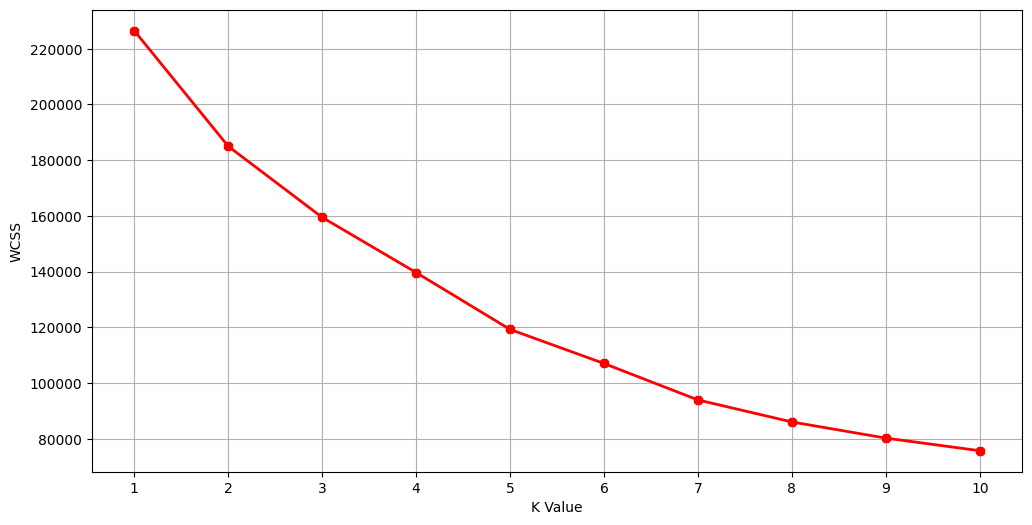

In [ ]:
# finding the clusters
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(cust.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



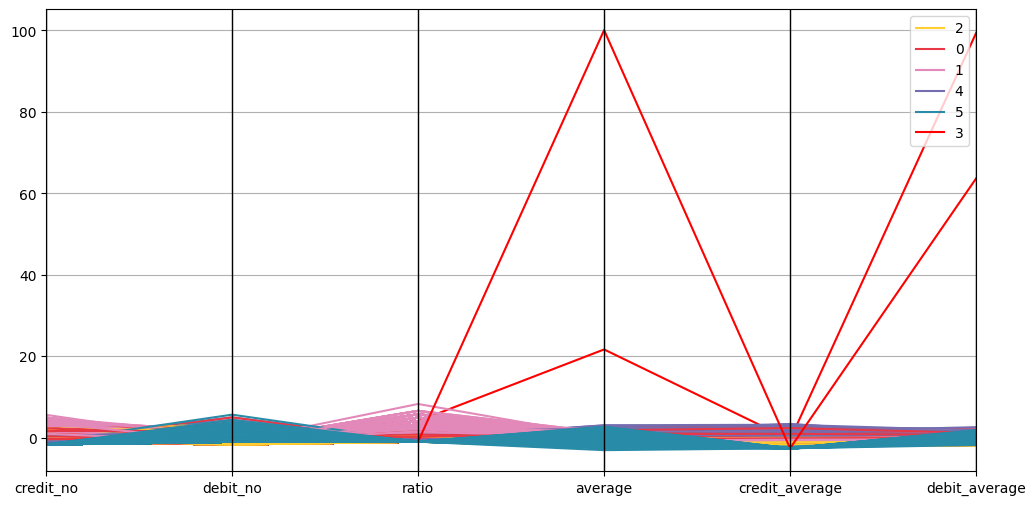

In [ ]:
km = KMeans(n_clusters=6)
clusters = km.fit_predict(cust.iloc[:,1:])
cust["label"] = clusters
import pandas as pd
from pandas.plotting import parallel_coordinates


# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(cust.iloc[:,2:], 'label', color=('#FFCE30', '#E83845', '#E389B9','#746EB0','#288BA8','#FF0000'))
plt.show()


In [ ]:
import plotly.express as px
fig = px.scatter_3d(cust, x='credit_average', y='debit_no', z='ratio',
                    color='label',
                    title="3D Scatter Plot")
fig.show()

After Segmenting the customers on various features we found that 5 clusters are formed and the features which differentiate it are Debit_no(No of debit transactions), credit_average ( Average amount of credit transactions done per customer), and ratio (credit/ debit ratio)


# Analyzing the Unusal behaviours

In [ ]:
df

cid     d_c      amt country
0       8345   Debit     4342      SE
1       3138   Debit     5852      SE
2       5233   Debit     3517      SE
3       8634   Debit     5325      DK
4       8076  Credit     4815      SE
...      ...     ...      ...     ...
155176  6741   Debit  4466616      CY
155177  6847   Debit   524750      DK
155178  6817  Credit   681636      CY
155179  7292   Debit      666      RU
155180  4277   Debit    30755      PL

[155079 rows x 4 columns]

In [ ]:
df1.groupby(["country",'d_c'])["amt"].sum()

country  d_c   
DK       Credit    127552440
         Debit     129857158
FI       Credit    129999598
         Debit     127717310
RO       Credit       539045
         Debit        637342
SE       Credit    128052102
         Debit     127770778
Name: amt, dtype: int64

In [ ]:
cust1

cid  Credit_No  Debit_No     ratio      Average  Credit_Average  \
0        0         10       9.0  1.111111  4061.526316     4249.000000   
1        1          6       9.0  0.666667  4614.733333     4208.000000   
2        2          9       8.0  1.125000  4548.000000     4474.777778   
3        3          6       1.0  6.000000  4083.571429     4062.500000   
4        4          5       8.0  0.625000  4770.538462     4731.000000   
...    ...        ...       ...       ...          ...             ...   
9991  9995          7       6.0  1.166667  4189.846154     4176.571429   
9992  9996          8      10.0  0.800000  4457.500000     4400.875000   
9993  9997          8       7.0  1.142857  2979.666667     3077.500000   
9994  9998          7      10.0  0.700000  6273.705882     6079.000000   
9995  9999         12       7.0  1.714286  3616.000000     3631.833333   

      Debit_Average  label  
0       3853.222222      4  
1       4885.888889      2  
2       4630.375000      4  
3       4210.000000      0  
4       4795.250000      2  
...             ...    ...  
9991    4205.333333      4  
9992    4502.800000      2  
9993    2867.857143      4  
9994    6410.000000      1  
9995    3588.857143      4  

[9996 rows x 8 columns]

In [ ]:
RO=df[(df['country']=='RO') & (df['d_c']=='Credit')]

In [ ]:
RO

cid     d_c   amt country
2041    5376  Credit  2361      RO
2088    6130  Credit  2667      RO
3205    4478  Credit  1341      RO
5152    3530  Credit  2301      RO
6164    6732  Credit  2097      RO
...      ...     ...   ...     ...
150595  5164  Credit  3531      RO
151993  6130  Credit  2553      RO
152430  3437  Credit  3968      RO
152536  1529  Credit  3592      RO
152818  8128  Credit  3423      RO

[175 rows x 4 columns]

In [ ]:
y0 = RO['amt']
fig = go.Figure()
fig.add_trace(go.Box(y=y0,name="Credit"))
fig.show()

In [ ]:
df[df['amt']>539045]

cid     d_c      amt country
155176  6741   Debit  4466616      CY
155178  6817  Credit   681636      CY

In [ ]:
cust1.columns

Index(['cid', 'Credit_No', 'Debit_No', 'ratio', 'Average', 'Credit_Average',
       'Debit_Average', 'label'],
      dtype='object')

In [ ]:
Q4=pd.DataFrame(df.groupby(["cid","d_c"])["amt"].sum()).reset_index()

In [ ]:
Q4[(Q4['d_c']=='Credit') & (Q4['amt']>539045) ]

cid     d_c     amt
13634  6817  Credit  741814

In [ ]:
m=pd.merge(cust1,Q4[(Q4['d_c']=='Credit') ],how="left",left_on=['cid'],right_on=['cid'])

In [ ]:
n=m[['cid','d_c','amt','label']]

In [ ]:
n

cid     d_c    amt  label
0        0  Credit  42490      4
1        1  Credit  25248      2
2        2  Credit  40273      4
3        3  Credit  24375      0
4        4  Credit  23655      2
...    ...     ...    ...    ...
9991  9995  Credit  29236      4
9992  9996  Credit  35207      2
9993  9997  Credit  24620      4
9994  9998  Credit  42553      1
9995  9999  Credit  43582      4

[9996 rows x 4 columns]

In [ ]:
n.groupby(['label'])["amt"].sum()

label
0     34188724
1     81901982
2     54575567
3    127964317
4     88194231
Name: amt, dtype: int64

In [ ]:
#539045